# Обработка текстов

#  Предобработка текстов - Preprocessing

Правильная предобработка текста позволяет добиться:
* улучшения получаемых результатов
* ускорения экспериментов
* воспроизводимости экспериментов
* удобной интерпретации и презентации результатов

## Наивные методы

In [13]:
sent = '''«Тинькофф Банк» — российский коммерческий банк, сфокусированный полностью на дистанционном обслуживании
, не имеющий розничных отделений. Штаб-квартира банка расположена в Москве.'''
sent.lower()

'«тинькофф банк» — российский коммерческий банк, сфокусированный полностью на дистанционном обслуживании\n, не имеющий розничных отделений. штаб-квартира банка расположена в москве.'

In [14]:
sent.split()[10]

'обслуживании'

## Регулярные выражение

Регулярное выражение — это последовательность символов, используемая для поиска и замены текста в строке или файле

* поиска в строке;
* разбиения строки на подстроки;
* замены части строки.

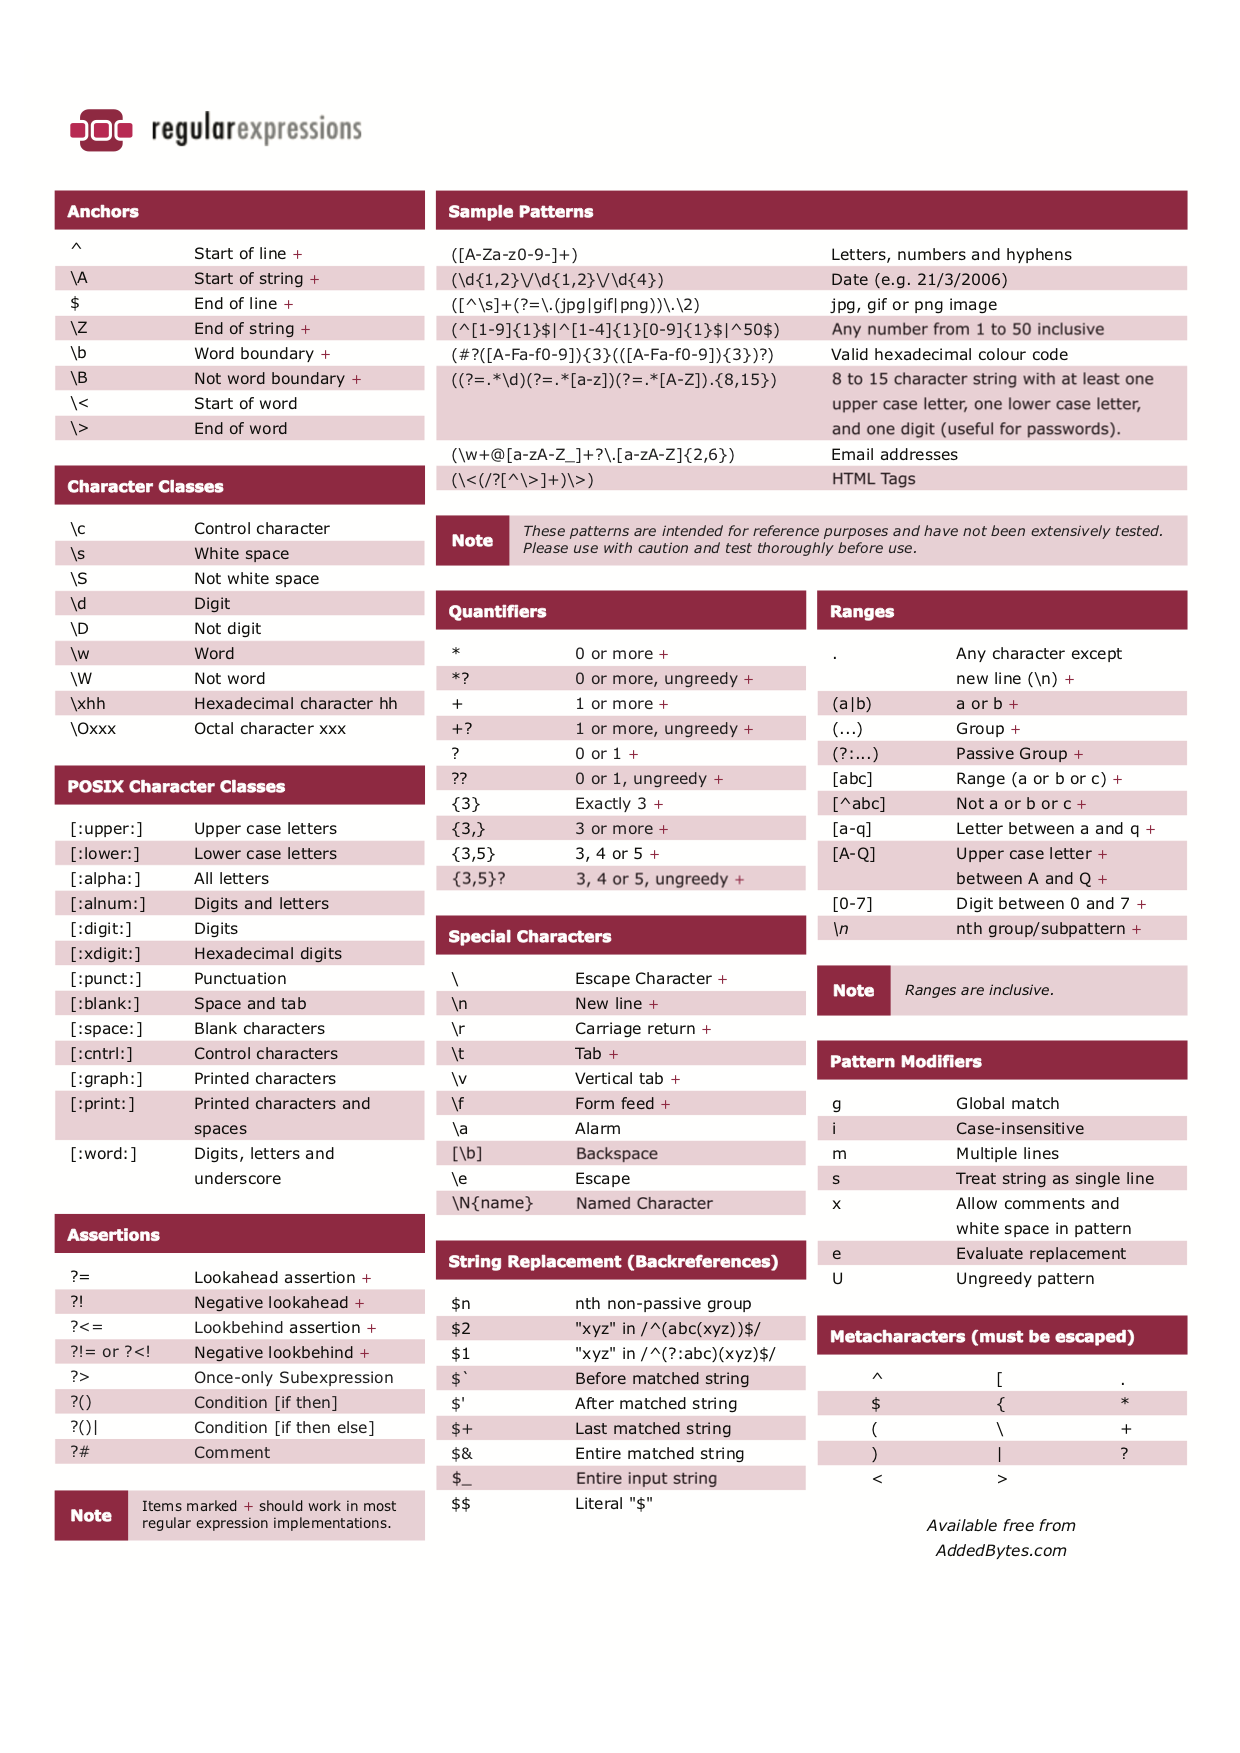

In [15]:
from IPython.display import Image
Image(filename='img/regular-expressions-cheat-sheet-v2.png') 

In [16]:
import re

In [17]:
result = re.match(r'Tinkoff', 'Tinkoff junior the best')
result

<_sre.SRE_Match object; span=(0, 7), match='Tinkoff'>

In [18]:
result = re.search(r'Tinkoff', 'Tinkoff Junior the Best Team Tinkoff Bank')
result.group(0)

'Tinkoff'

In [19]:
result = re.findall(r'Tinkoff', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

['Tinkoff', 'Tinkoff']

In [20]:
result = re.split(r'the', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

['Tinkoff Junior ', ' Best Team Tinkoff Bank']

In [21]:
result = re.sub(r'Bank', 'World', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

'Tinkoff Junior the Best Team Tinkoff World'

In [22]:
# можно создавать паттерны
pattern = re.compile('Tinkoff')
result = pattern.findall('Tinkoff Junior the Best Team Tinkoff Bank')
print(result

SyntaxError: unexpected EOF while parsing (<ipython-input-22-c9d7d3cfe8a5>, line 4)

In [23]:
# TODO: Разделите используя знаки пунктуации
line = 'asdf fjdk;afed,fjek,asdf,foo' 
#  Ваш код здесь

In [24]:
# TODO: Оставить в тексте только русские буквы
sent = '''Ночь закрытых дверей!!! Штаб-квартира Tinkoff.ru 27 ноября'''
# Ваш код здесь

In [25]:
# TODO: Извлечь домены, заменить все домены на tinkoff.ru
string = 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz'


Больше примеров регулярных выражений: https://regex101.com/r/nG1gU7/27

## Спелл чекеры - проверка правописания

## Левенштейн

Расстояние Левенштейна (также редакционное расстояние или дистанция редактирования) между двумя строками в теории информации и компьютерной лингвистике — это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую.

In [26]:
# Возможная самостоятельная работа: Реализовать алгоритм левенштейна

In [27]:
!pip install python-Levenshtein

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
import Levenshtein

https://pypi.org/project/pythoьn-Levenshtein/

In [29]:
Levenshtein.distance('привет', 'приве')

1

In [30]:
# Возможная самостоятельная работа: Реализовать алгоритм 

In [31]:
# Домашняя работа:
1. Реализовать алгоритм,проверяющий корректность написания страны

SyntaxError: invalid syntax (<ipython-input-31-408ffd47df53>, line 2)

# Уменьшение словаря
* Плохие слова:
* Слишком частые 
  * русский язык: и, но, я, ты, ... 
  * английский язык: a, the, I, ... 
  * специфичные для коллекции: "сообщать" в новостях
* Слишком редкие
* Стоп-слова 
  *Предлоги, междометия, частицы, цифры

## NLTK

https://www.nltk.org

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariatrapicyna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
list(sw_eng)[:6]

['now', 'mightn', 'through', 'have', 'himself', 'weren']

In [34]:
from nltk.corpus import stopwords
sw_ru = set(stopwords.words('russian'))
list(sw_ru)[:6]

['два', 'ну', 'них', 'чуть', 'были', 'совсем']

In [35]:
sent = 'Наступило молчание. Графиня глядела на гостью, приятно улыбаясь, впрочем, не скрывая \
того, что не огорчится теперь нисколько, если гостья поднимется и уедет.\
Дочь гостьи уже оправляла платье, вопросительно глядя на мать, как вдруг из\
соседней комнаты послышался бег к двери нескольких мужских и женских ног,\
грохот зацепленного и поваленного стула, и в комнату вбежала тринадцатилетняя девочка,\
запахнув что-то короткою кисейною юбкою, и остановилась посередине комнаты. Очевидно было,\
она нечаянно, с нерассчитанного бега, заскочила так далеко. В дверях в ту же минуту показались\
студент с малиновым воротником, гвардейский офицер, пятнадцатилетняя девочка и толстый румяный\
мальчик в детской курточке.'

In [36]:
# TODO: Отчистить текст от стоп слов
# Ваш код здесь

### Токенизация
разделение на токены, элементарные единицы текста

In [37]:
light_string = 'Привет, какая у меня полная сумма задолженности по кредитной карте'
light_string.split()

['Привет,',
 'какая',
 'у',
 'меня',
 'полная',
 'сумма',
 'задолженности',
 'по',
 'кредитной',
 'карте']

In [68]:
hard_string = 'Ой, у вас несколько кредитных карт, выберите, пожалуйста, одну и введите ее номер'
hard_string.split()

['Ой,',
 'у',
 'вас',
 'несколько',
 'кредитных',
 'карт..,',
 'выберите,',
 'пожалуйста,',
 'одну',
 'и',
 'введите',
 'ее',
 'номер']

In [69]:
hard_string = 'Привет! Ты видел мр.Смита сегодня утром?'
expr = r'[^(\w.\w)\w\s]'
parser=re.compile(expr)
tmp_string = parser.sub(r'', hard_string)
print(tmp_string.split())

['Привет', 'Ты...', 'видел', 'мр.Смита', 'сегодня', 'утром']


In [40]:
# TODO: Разделить строку на предложения
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
# Ваш код здесь

In [41]:
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
exp = r'(?<!\w\.\w.)(?<![А-Я][а-я]\.)(?<=\.|\?)\s'
tmp_string = re.split(exp, hard_string)
print(tmp_string)

['Привет.', 'Ты видел мр.Смита сегодня утром?']


## Нормализация

### Стемминг
СТЕММИНГ - нормализация слов путем отбрасывания окончаний (согласно правилам, основанным на грамматике языка)
* Стеммеры (nltk)
    * Porter stemmer
    * Snowball stemmer
    * Lancaster stemmer
    * MyStem

In [42]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'George admitted the talks happened'
print(' '.join([stemmer.stem(word) for word in sent.split()]))


georg admit the talk happen


In [43]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'write wrote written'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

write wrote written


In [44]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='russian')
sent = 'Опрошенные считают налоги необходимыми'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

опрошен счита налог необходим


In [45]:
sent = 'поле пол полка полк'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

пол пол полк полк


In [46]:
sent = 'крутой крутейший крутить'
print(' '.join([stemmer.stem(word) for word in sent.split()]))


крут крут крут


### Лемматизация

Лемматизация - приведение слов к начальной морфологической форме (с помощью словаря и грамматики языка)

Лемматизаторы
* pymorphy2 (язык русский, украинский)
* mystem3 (язык русский)
* Wordnet Lemmatizer (NLTK, язык английский, требует POS метку)
* Metaphraz (язык русский)
* Coda/Cadenza (языки русский и английский)

Лемматизатор на самом деле довольно сложный, ему нужны теги частей речи (POS).

По умолчанию функция WordNetLemmatizer.lemmatize () будет считать, что это слово является существительным, если на входе не обнаружен тег POS.

Сначала вам понадобится функция pos_tag, чтобы пометить предложение и использовать тег, чтобы преобразовать его в теги WordNet, а затем передать его в WordNetLemmatizer.

Примечание. Лемматизация не будет работать только на одиночных словах без контекста или знании своего тега POS 

In [47]:
# Вспомогательная задача
from nltk import wordnet, pos_tag
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

In [48]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mariatrapicyna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
sent = 'George admitted the talks happened'.split()
pos_tagged = pos_tag(sent)
print(pos_tagged)

[('George', 'NNP'), ('admitted', 'VBD'), ('the', 'DT'), ('talks', 'NNS'), ('happened', 'VBD')]


In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariatrapicyna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
print([get_wordnet_pos(tag) for word, tag in pos_tagged])


['n', 'v', 'n', 'n', 'v']


In [52]:
from nltk import WordNetLemmatizer
def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

In [53]:
sent = 'George admitted the talks happened'
my_lemmatizer(sent)

'George admit the talk happen'

In [54]:
sent = 'write wrote written'
my_lemmatizer(sent)

'write write write'

In [55]:
import pymorphy2
def my_lemmatizer_ru(sent):
    lemmatizer = pymorphy2.MorphAnalyzer()
    tokenized_sent = sent.split()
    return ' '.join([lemmatizer.parse(word)[0].normal_form
                    for word in tokenized_sent])

In [56]:
sent = 'Опрошенные считают налоги необходимыми'
my_lemmatizer_ru(sent)

'опросить считать налог необходимый'

In [57]:
sent = 'поле пол полка полк'
my_lemmatizer_ru(sent)

'пол половина полка полк'

In [58]:
sent = 'крутой крутейший крутить'
print(my_lemmatizer_ru(sent))

крутой крутый крутить


*Стемминг *
* Плохо работает для русского языка
* Нормально работает для английского
* Повышает качество модели

*Лемматизация*
* Лучше стемминга для русского языка
* Хорошо работает для английского языка
* Повышает качество модели
* Гораздо медленнее чем стемминг

## Представление текста

### One-hot encoding

Представление словаря в виде бинарных векторов, у которых все значения равны 0, кроме одного, отвечающего за соответствующее слово

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
corpus = ['Кредитная', 'Дебетовая', 'All Airlines', 'Bravo', 'All games']
label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(corpus)

In [60]:
onehot_encoder = OneHotEncoder(sparse=False)
corpus_encoded = corpus_encoded.reshape(len(corpus_encoded), 1)
corpus_onehot_encoded = onehot_encoder.fit_transform(corpus_encoded)
print(corpus_onehot_encoded)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


### CountVectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [62]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [63]:
X.todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 2, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

### TF-IDF

TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова в пределах отдельного документа.

IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции. Основоположником данной концепции является Карен Спарк Джонс. Учёт IDF уменьшает вес широкоупотребительных слов. Для кmаждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vectorizer = TfidfVectorizer()

In [65]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
Y = idf_vectorizer.fit_transform(corpus)
print(idf_vectorizer.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [66]:
Y.todense()

matrix([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674],
        [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
         0.85322574, 0.22262429, 0.        , 0.27230147],
        [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
         0.        , 0.28847675, 0.55280532, 0.        ],
        [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674]])

## Близость

Часто возникает задач найти близкие друг к другу предложения.

In [67]:
words = (" ".join(df.about.values)).split()
unigrams_counter = Counter(words)
bigrams = ngrams(words, 2)
bigrams_counter = Counter(bigrams)

three_chars = ngrams((" ".join(df.about.values)), 3)
three_chars_counter = Counter(three_chars)

print('Количество би-грам: {0}'.format(len(bigrams_counter.most_common())))
print('Количество уни-грам: {0}'.format(len(unigrams_counter.most_common())))
print('Количество буквенных три-грамм: {0}'.format(len(three_chars_counter.most_common())))
print()

NameError: name 'df' is not defined

In [10]:
# Todo: найти близость между предложениями, используя триграммы

## Го что нибудь порешаем

In [11]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)

In [12]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [ ]:
print(twenty_train.target_names[twenty_train.target[0]])

In [ ]:
len(twenty_train.data)

In [ ]:
twenty_train.target_names

In [ ]:
twenty_train.target[:10]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

In [ ]:
# Самостоятельная работа: попробовать другие преобразования

In [ ]:
# Ваш код здесь

# Пицца

In [ ]:
import json

In [ ]:
with open('train.json') as fin:
    trainjson = json.load(fin)

In [ ]:
trainjson[0]

In [ ]:
print('UID:\t', trainjson[0]['request_id'], '\n')
print('Title:\t', trainjson[0]['request_title'], '\n')
print('Text:\t', trainjson[0]['request_text_edit_aware'], '\n')
print('Tag:\t', trainjson[0]['requester_received_pizza'], end='\n')

In [ ]:
import pandas as pd
df = pd.io.json.json_normalize(trainjson) # Pandas magic... 
df_train = df[['request_id', 'request_title', 
               'request_text_edit_aware', 
               'requester_received_pizza']]
df_train.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

train, valid = train_test_split(df_train, test_size=0.2)

In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk import pos_tag

In [ ]:
pos_tag

In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    morphy_tag = {'NN':'n',
                  'JJ':'a',
                  'VB':'v',
                  'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

lemmatize_sent('He is walking to school')

In [ ]:
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stopwords_en
            and not word.isdigit()]

In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [ ]:
# Ваш код здесь